<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/ML_ROC_BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Logistic Regression
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Plot settings

In [ ]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [ ]:
# Importing the datasets
df     = pd.read_csv('OSA_Data_Feb_2023.csv')
# y      = df.OSA.values
# x_data = df.drop(['OSA'], axis = 1)

# Display the data

In [ ]:
df.iloc[:,:-1].describe()

,Age,Sex,Height (in),Weight (lb),BMI>30,Neck>17,Airway MF,MF >2,BAN,AHI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.031000,0.592000,67.037000,227.653000,0.689000,0.661000,2.722000,0.582000,1.932000,29.199000
std,14.320374,0.491709,4.624339,58.216731,0.463134,0.473607,1.007835,0.493477,1.018043,27.862766
min,19.000000,0.000000,15.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,64.000000,186.750000,0.000000,0.000000,2.000000,0.000000,1.000000,7.000000
50%,54.000000,1.000000,67.000000,220.000000,1.000000,1.000000,3.000000,1.000000,2.000000,20.000000
75%,65.000000,1.000000,70.000000,262.000000,1.000000,1.000000,4.000000,1.000000,3.000000,44.000000
max,96.000000,1.000000,79.000000,500.000000,1.000000,1.000000,4.000000,1.000000,3.000000,155.000000


In [ ]:
df.head(10)

,Age,Sex,Height (in),Weight (lb),BMI>30,Neck>17,Airway MF,MF >2,BAN,AHI,OSA
0,49,0,66.0,127,0,0,1,0,0,0,0
1,42,0,66.0,165,0,0,1,0,0,0,0
2,58,1,68.0,138,0,0,1,0,0,0,0
3,44,0,60.0,118,0,0,1,0,0,0,0
4,55,0,64.0,136,0,0,1,0,0,0,0
5,43,0,66.0,148,0,0,2,0,0,0,0
6,83,1,72.0,180,0,1,1,0,1,0,0
7,49,0,60.0,175,1,0,2,0,1,0,0
8,69,0,67.5,232,1,0,2,0,1,0,0
9,44,0,61.0,148,0,1,2,0,1,0,0


**Data Visulatization**

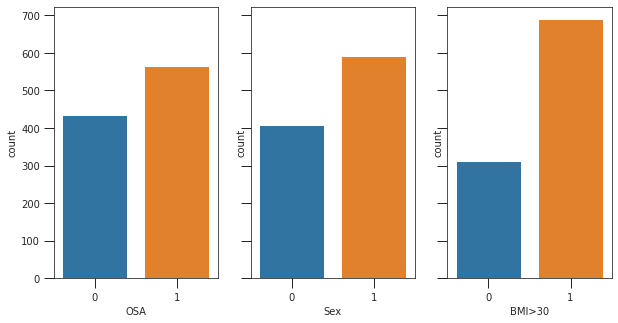

In [ ]:
from matplotlib import pyplot as plt

# fig, (ax1, ax2,ax3) = plt.subplots(1,3)
# fig.suptitle('Data Statistics')
# ax1.plot(OSA, 'o-')
# ax1.set_ylabel('Damped oscillation')
# ax2.plot(x2, y2, '.-')
# ax2.set_xlabel('time (s)')
# ax2.set_ylabel('Undamped')
# plt.show()

# plt.subplot(13)
# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)
# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)
# # add a polar subplot
# plt.subplot(223, projection='polar')

fig, axes = plt.subplots(1,3,figsize=(10,5),sharey=True)
sns.countplot(ax=axes[0],data=df, x='OSA')
sns.countplot(ax=axes[1],data=df, x='Sex')
sns.countplot(ax=axes[2],data=df, x='BMI>30')
plt.savefig('Statistics.png')


# Normalizing the data

In [ ]:
features = ['Age',	'Sex',	'Height (in)'	,'Weight (lb)','BMI>30',
                  'Neck>17','Airway MF','MF >2','BAN','AHI']
x_data = df[features]
y         = df['OSA']

# Normalize data
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [ ]:
x

,Age,Sex,Height (in),Weight (lb),BMI>30,Neck>17,Airway MF,MF >2,BAN,AHI
0,0.389610,0.0,0.796875,0.172949,0.0,0.0,0.25,0.0,0.000000,0.000000
1,0.298701,0.0,0.796875,0.257206,0.0,0.0,0.25,0.0,0.000000,0.000000
2,0.506494,1.0,0.828125,0.197339,0.0,0.0,0.25,0.0,0.000000,0.000000
3,0.324675,0.0,0.703125,0.152993,0.0,0.0,0.25,0.0,0.000000,0.000000
4,0.467532,0.0,0.765625,0.192905,0.0,0.0,0.25,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,0.259740,1.0,0.890625,0.578714,1.0,1.0,0.50,0.0,0.666667,0.741935
996,0.298701,0.0,0.687500,0.623060,1.0,1.0,1.00,1.0,1.000000,0.748387
997,0.285714,1.0,0.921875,0.523282,1.0,1.0,1.00,1.0,1.000000,0.864516
998,0.441558,0.0,0.796875,0.549889,1.0,1.0,0.75,1.0,1.000000,0.896774


## Correlation between different variables

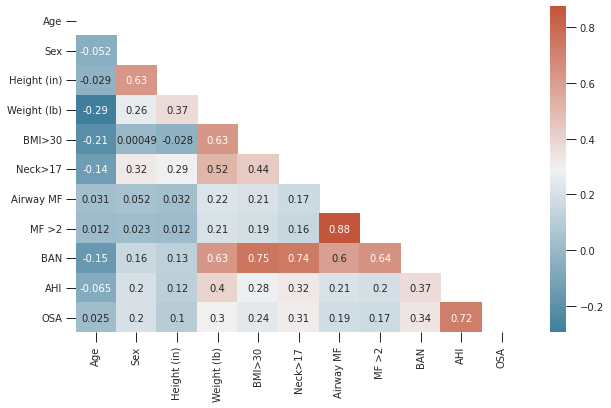

In [ ]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 6))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')


## Class distribution in OSA dataset

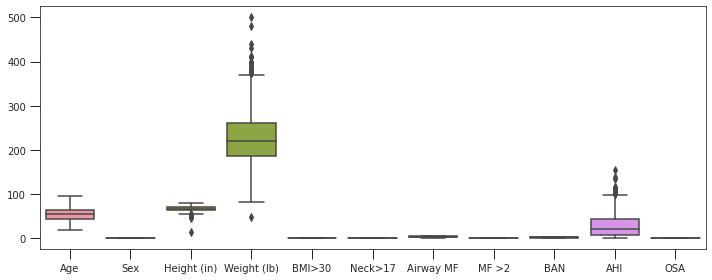

In [ ]:
fig, axs = plt.subplots(figsize=(10, 4), tight_layout=True)
sns.boxplot(data=df)
plt.show()

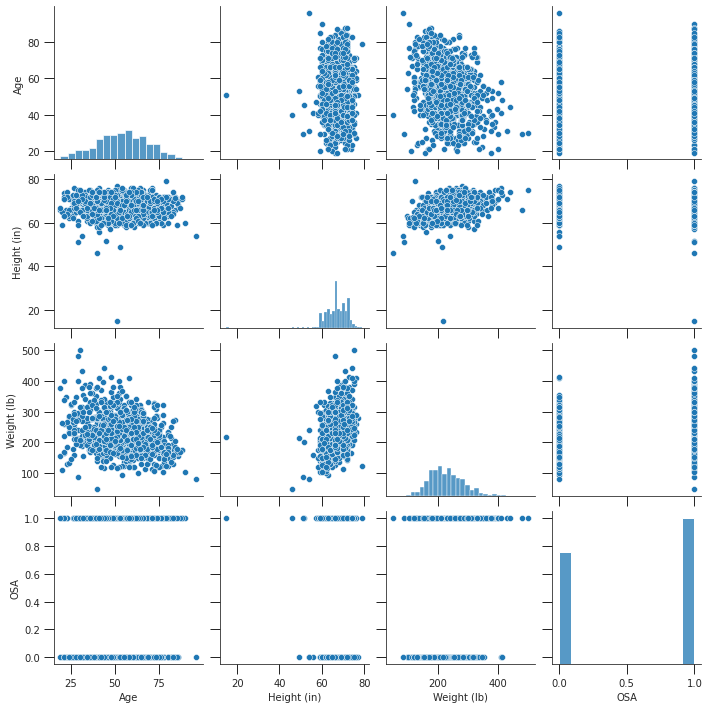

In [ ]:
sns.pairplot(df, vars=["Age","Height (in)","Weight (lb)","OSA"])
plt.grid()
plt.savefig('Correction with OSA.png')
plt.show()

# Preparing data for machine learning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix 

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import plot_confusion_matrix

  cm1  = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1 = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1    = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  ##########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2  = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2    = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)

  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=10, color='k')

  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=10, color='k')
  
  f.suptitle(' Confusion matrix for '+name, fontsize=11)
  plt.savefig(name + ".png")
  plt.show()

Performance Criteria in Training Case for LR
Accuracy  0.936
precision 0.972
recall 0.909
Performance Criteria in Testing Case for LR
Accuracy  0.917
precision 0.975
recall 0.883


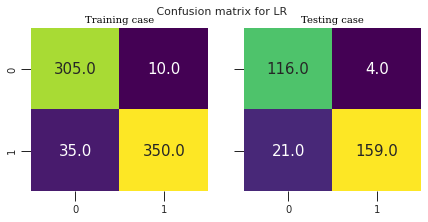

Performance Criteria in Training Case for SVM
Accuracy  0.936
precision 0.994
recall 0.888
Performance Criteria in Testing Case for SVM
Accuracy  0.903
precision 0.993
recall 0.844


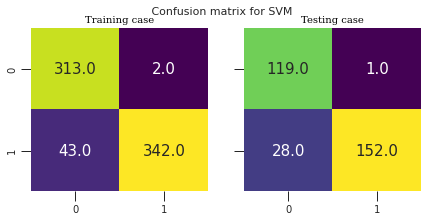

Performance Criteria in Training Case for GBC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for GBC
Accuracy  1.000
precision 1.000
recall 1.000


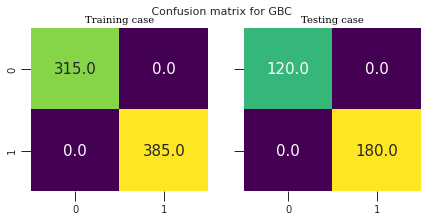

Performance Criteria in Training Case for GNB
Accuracy  0.919
precision 0.904
recall 0.953
Performance Criteria in Testing Case for GNB
Accuracy  0.920
precision 0.919
recall 0.950


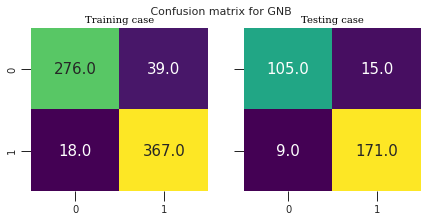

Performance Criteria in Training Case for KNC
Accuracy  0.920
precision 0.951
recall 0.901
Performance Criteria in Testing Case for KNC
Accuracy  0.857
precision 0.910
recall 0.844


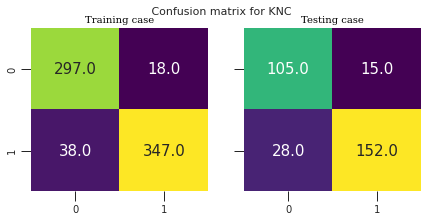

Performance Criteria in Training Case for DT
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  1.000
precision 1.000
recall 1.000


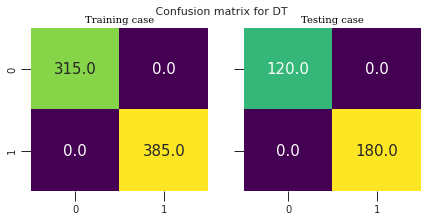

Performance Criteria in Training Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000


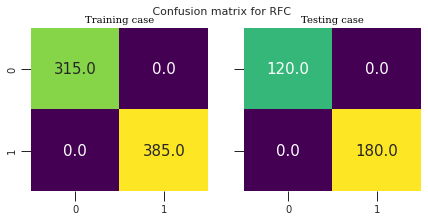

Performance Criteria in Training Case for ANN
Accuracy  0.696
precision 0.644
recall 1.000
Performance Criteria in Testing Case for ANN
Accuracy  0.723
precision 0.690
recall 0.978


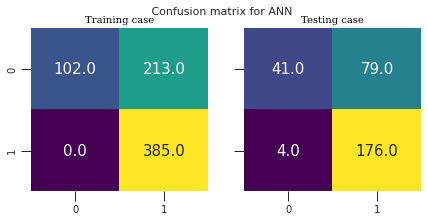

In [ ]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)

#SVM ####################################
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_SVC.png')
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GBC.png')
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))

#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GNB.png')
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))

# A random forest classifier.
# A random forest is a meta estimator that fits a number of decision tree 
# classifiers on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr5,tpr5,label="KNN, AUC="+str(auc))

# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)
# tree.plot_tree(clf)
# ax1.plot(fpr6,tpr6,label="DT, AUC="+str(auc))

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr7,tpr7,label="RandomForestClassifier, AUC="+str(auc))

#Neural network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr8,tpr8,label="MLPClassifier, AUC="+str(auc))



In [ ]:
# import matplotlib.pyplot as plt

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr1, tpr1, label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2, tpr2, label="SVC, AUC="+str(auc))
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# ax = plt.axes()
# fig = plt.figure(figsize=(8,6))
# ax.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# ax.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))
# ax.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))
# ax.plot(fpr5,tpr5,label="RandomForestClassifier, AUC="+str(auc))
# ax.plot(fpr6,tpr6,label="KNN, AUC="+str(auc))
# # plt.legend()
# plt.savefig('ROC.png')

In [ ]:
# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')
# ax = fig.add_subplot(111)
# plt.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.set_xticklabels(names)
# plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


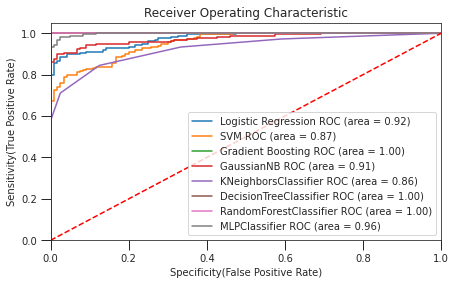

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'SVM',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model': tree.DecisionTreeClassifier(),
},
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'MLPClassifier',
    'model': MLPClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_train) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display


In [ ]:
# from sklearn.metrics import RocCurveDisplay

# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')

# disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate \n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")

# disp = RocCurveDisplay.from_estimator(svm, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")

# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")


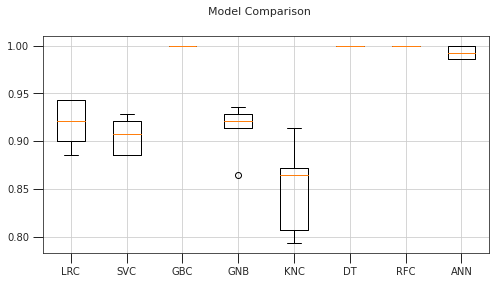

In [ ]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()